## Assignment 8

Theodor Jendle - 9901134339 - 6h

Noah Lanai - 9808252192 - 6h

***1***
**a)**

If we consider a tree structure, for simplicity, Breadth First Search (BFS for short) will search through a complete level of the tree and then procedes to the next level and searches through that one. So with the branching factor $d$ we receive that the number of nodes in a certain level $x$ of the tree is $d^x$.
Therefore we have that the maximum number of iterations when using BFS, given these parameters, is: 

$\sum_0^r d^r$

Where an iteration corresponds to a single computation.

**b)**

The total number of possible solutions, i.e number of nodes in level $r$, is $d^r$ and the length of each of these paths is $r$. Thus we have that the maximum amount of memeroy when using BFS is:

$rd^r$

***2***

In order to avoid this problem we need to label the upper node to be greater than 2, such that the goal node is selected in the case of a tie. The reason for labeling this certain node to be greater than 2 is because the 3rd node, of the verticle line, is the only state where we can traverse to the goal node and this node also have a directed edge to the upper node. The rest of the states only has one directed edge which leads to no choice of traversal which implies that their labels does not matter, thus only the upper node needs to be prioritiesed and labeled accordingly.

Below we will consider the following format of nodes: Start node - first verticle node - second verticle node - upper node - goal node.

The labels which will lead to divergence:

0 - 3 - 4 - 1 - 2

0 - 4 - 3 - 1 - 2

The labels which will lead to finding the goal:

0 - 1 - 4 - 3 - 2

0 - 4 - 1 - 3 - 2

0 - 1 - 3 - 4 - 2

0 - 3 - 1 - 4 - 2

In [2]:
import numpy as np
import pandas as pd
from IPython.display import Image

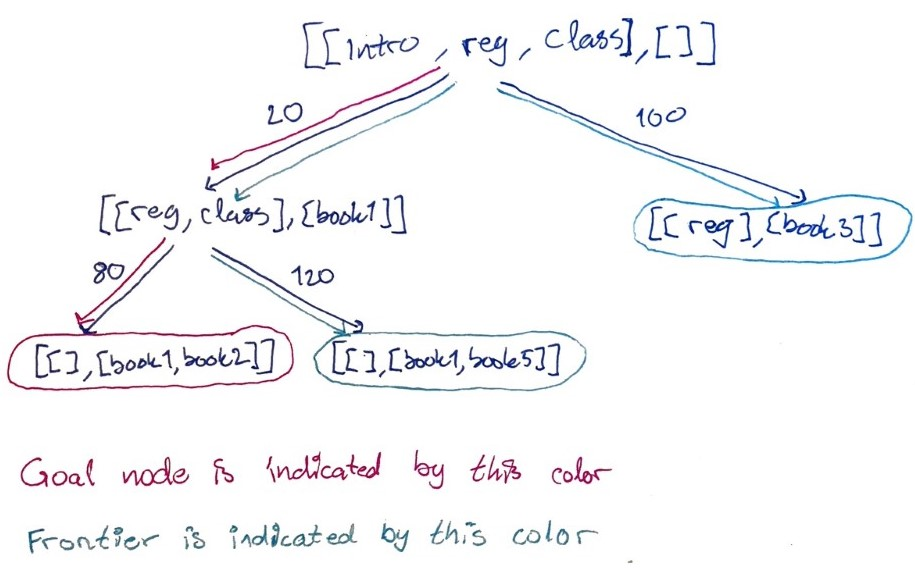

In [9]:
Image("ass_8_bild.jpg")

Inorder to present an admissible  heuristics function we need it to satisfy that the estimated cost can never exceed the the lowest possible from the current point in the path.

We know that the maximum number of topics in the customised textbook can not cover more than 6 topics and that the lowest cost is 20, book 1. We therefore can make use of the heuristic function:

$h(n) = 3\cdot \text{number of topics in list }n$

To account for scalability we can define the heuristic function as:

$h(n) = floor\bigg(\frac{\min{\text{cost}(p)}}{\text{maximum number of topics}}\bigg) \cdot \text{number of topics in list } n, \quad \forall p \in \text{edges}$

since the fewer topics we have in a given point corresponds to being closer to the goal node which contains an empty topic list.

**4**
**a)**

If we consider the cost to be 1 for every step, the first 5 paths we choose is:

NW - E - S - NE - SW

or

43:44:34 - 43:53 - 43:42 - 43:44:54 - 43:42:32

where the first integer denotes x-coordinate, second integer y-coordinate and : is a symbol for movement to.

This is how the priority list is being updated after each path:


| Path | Position | Priority list |
| --- | --- | --- |
| 1 | 43 | 44, 53, 42 |
|  | 44 | 34, 53, 42, 54 |
|  | 34 | 53, 42, 54 |
| 2 | 43 | 53, 42, 54 |
|  | 53 | 42, 54, 63, 52 |
| 3 | 43 | 42, 54, 63, 52 |
|  | 42 | 54, 32, 63, 52, 41 |
| 4 | 43 | 44, 54, 32, 63, 52, 41 |
|  | 44 | 54, 32, 63, 52, 41 |
|  | 54 | 32, 63, 52, 41, 64 |
| 5 | 43 | 42, 32, 63, 52, 41, 64 |
|  | 42 | 32, 63, 52, 41, 64 |
|  | 32 | 63, 52, 41, 64, 31, 22 |

**b)**

First of all we notice that all three algorithms produce the same resulting path which is a good sign. The difference between the algorithms is the number of iterations needed to find a solution, where Best-First-Search was the algorithm which required the least computational iterations. The number of iterations needed for solving this problem was 48, 71, 362 for Best-First-Search, A* and Breadth-First-Search respectively. We can see, when we run the program, that both BFS and A* covers alot of unneccessary area whilst Best-First-Search covers almost only the necessary nodes. Best-FS and A*, compared to BFS, has a more structured searching method whilst BFS uniformally distributes its search pattern. 

The way BFS finds its path to the solution is by looping through every parent and checking weather the goal has been reached, once all parents has been iterated over the algorithm procedes to loop through all the children nodes, which in turn becomes parents unless it is a leaf node, and repeats this process, making the algorithm complexity-wise non-efficient. In other words, the algorithm makes use of a queue which uses the concepts of **first in first out**

Best-First-Search on the otherhand uses a priority queue instead of a queue, which sorts which node to visit next depending only on the cost of that traversal.  

The A* algorithm follows the function $f(n) = g(n) + h(n)$ where $g(n)$ is the cost function at node $n$ and $h(n)$ is the heuristic cost from node $n$ to the goal node. The priority queue of the algorithm is based on the path with lowest function value $f(n)$. 

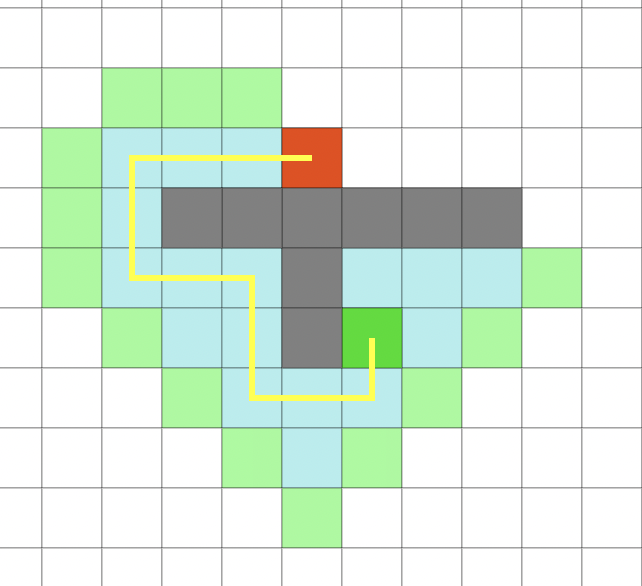

In [8]:
Image("GBFS.png")

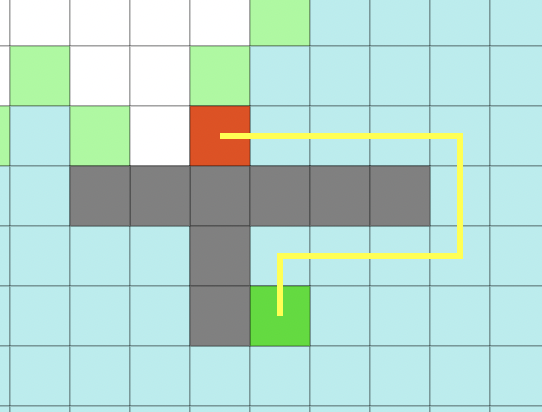

In [9]:
Image("BFS.png")

**c)**

This is an example of when the breadth first search algorithm (BFS) is shorter than the greedy best first search algorithm (GBFS). The GDBS is an informational search, which means that it uses the Manhattan distance heuristic. Compared to the BFS which is an uninformed search. Because of this, the GBFS follows the rule of minimizing the manhattan distance which wants stay as close to the end point as possible. Whith these walls placed as in the pictures, it is more efficient for the GBFS to move to the left considering the coordinate distances. Which means that the BFS will find the shortest distance arount the points which is to the right.